In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
#loading the dataset to a Pandas DataFrame
df = pd.read_csv('creditcard.csv')
# First 5 rows of the dataset
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [48]:
#Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
#Checking the number of missing value in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
# distribution of legit transaction & frudulent transaction
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is highly unbalanced.
0 --> Normal Transaction
1 --> Fraudulent transaction


In [51]:
#Separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [52]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [53]:
#Statstical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [54]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [55]:
#Compare the value's for both transactions
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under.Sampling
Build a sample dataset containing similar distribution of normal transactions and fraudulent transactions.
Number of fraudulent transaction --> 492

In [56]:
legit_sample = legit.sample(n = 492)

#Concatenating 2 Dataframes.

In [57]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [58]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223273,143320.0,-0.504139,-0.073904,0.903314,-1.990775,0.247912,-0.312578,0.734908,-0.267965,-1.116091,...,-0.288599,-0.269830,-0.251863,-0.504938,-0.135791,0.496634,-0.242697,-0.092362,49.80,0
46833,42949.0,-0.526154,0.480328,2.064511,0.390035,0.524760,1.870211,0.242831,0.344176,-0.039791,...,-0.031088,0.113152,-0.401121,-1.717233,0.318612,-0.189708,-0.045474,-0.159461,52.23,0
148621,90083.0,-1.046752,1.538402,0.409611,-1.335489,1.303127,-0.866705,1.435894,-0.455248,1.541457,...,-0.558751,-1.164687,-0.174643,0.554298,0.079292,-0.077295,-0.096037,0.024340,9.42,0
226274,144561.0,-0.810986,-0.361352,-4.373197,-1.359466,0.849170,4.626505,5.294366,-0.400981,-0.709889,...,0.324149,1.310251,0.409632,0.677758,0.032882,-0.409022,0.303092,-0.155786,912.64,0
32903,37008.0,0.835190,-0.103485,0.282218,1.209311,-0.198004,-0.265311,0.369273,0.003708,-0.503343,...,-0.283627,-1.228305,0.133930,0.159099,0.063003,-0.856106,-0.005562,0.045100,159.34,0


In [59]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [60]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [61]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94682.380081,-0.213611,0.069160,-0.059708,0.029581,-0.148790,0.070448,0.044473,0.126108,-0.057741,...,-0.012688,-0.004903,0.071066,0.003626,0.002044,-0.021015,0.004438,0.014794,-0.009588,103.548537
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [62]:
#Splitting the data into Features & Targets

In [63]:
X = new_dataset.drop(columns = 'Class', axis =1)
Y = new_dataset['Class']

In [64]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
223273  143320.0 -0.504139 -0.073904  0.903314 -1.990775  0.247912 -0.312578   
46833    42949.0 -0.526154  0.480328  2.064511  0.390035  0.524760  1.870211   
148621   90083.0 -1.046752  1.538402  0.409611 -1.335489  1.303127 -0.866705   
226274  144561.0 -0.810986 -0.361352 -4.373197 -1.359466  0.849170  4.626505   
32903    37008.0  0.835190 -0.103485  0.282218  1.209311 -0.198004 -0.265311   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [65]:
print(Y)

223273    0
46833     0
148621    0
226274    0
32903     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [66]:
# Split data into Training Data and Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y,random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [68]:
#Model training
#Logistics Regresssion

model = LogisticRegression( max_iter = 1000)

In [69]:
#Training the Logistic regression model with training data

model.fit(X_train, Y_train)


C:\Users\ASUS\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [70]:
#Model Evaluation
    #Accuracy Score
#Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [71]:
print("Accuracy on Training data: ",training_data_accuracy)


Accuracy on Training data:  0.9593392630241423


In [72]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9137055837563451


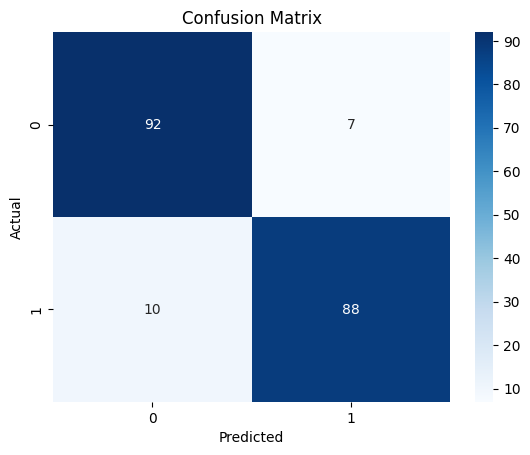

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.93      0.90      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197

ROC AUC Score: 0.9645


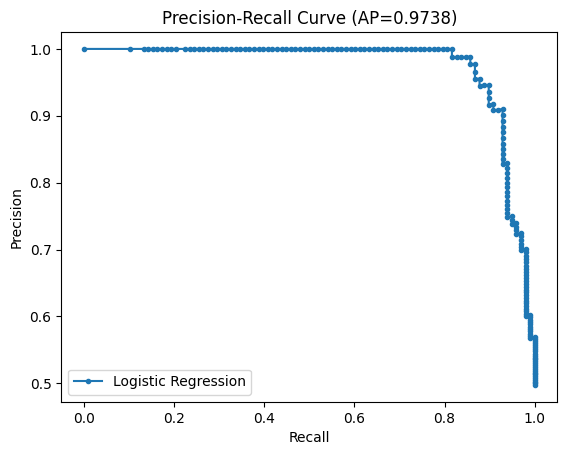

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(Y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(Y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)
avg_precision = average_precision_score(Y_test, y_prob)

plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={avg_precision:.4f})')
plt.legend()
plt.show()


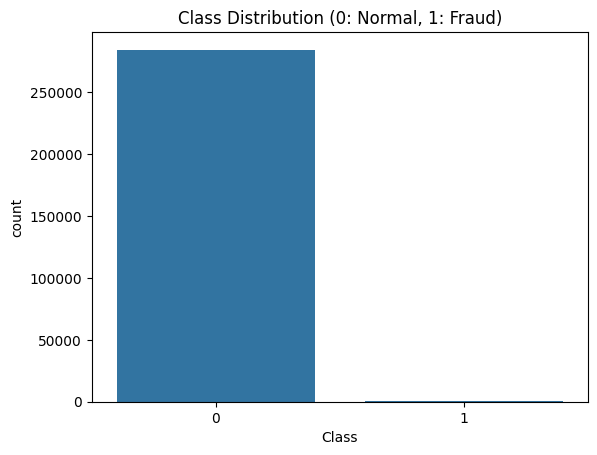

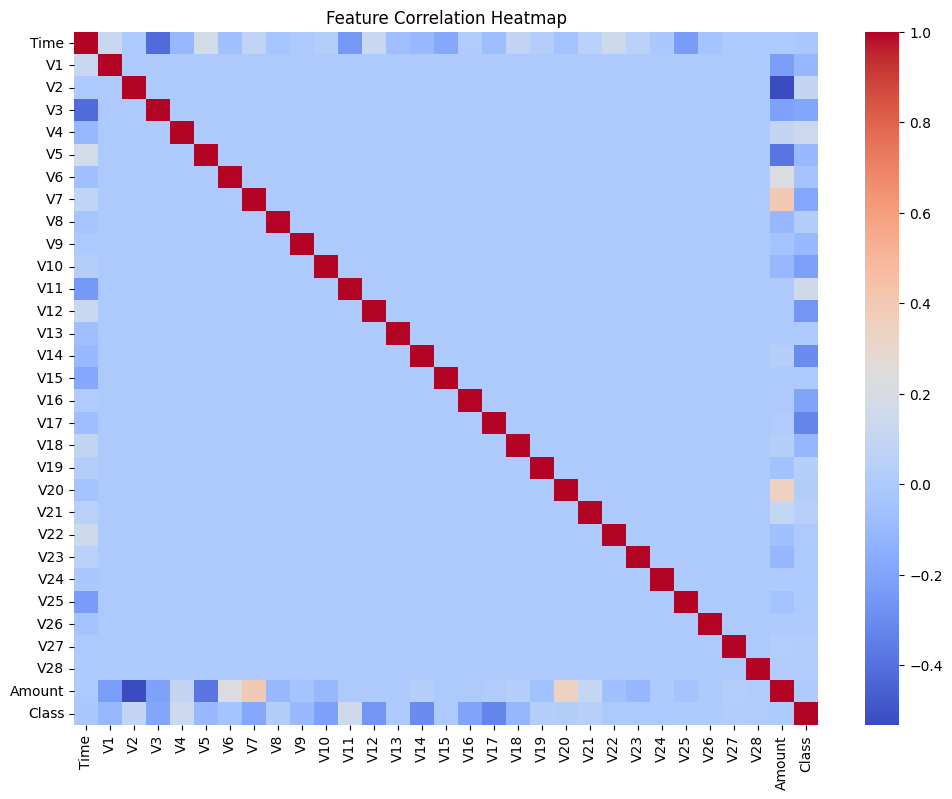

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud vs Normal count plot
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

